# Lesson 10 - Fetching Data - Files & APIs

# URL Library `urllib`

- Uniform Resource Locator (an 'address' for the thing you wan on The Internet) 
- Library (Other's code we can use)

[`https://docs.python.org/3/library/urllib.html`](https://docs.python.org/3/library/urllib.html)

- We've been indirectly using `urllib` everytime we loaded data into pandas by reading from a url.
- Here's a snapshot of the pandas making use of `urllib`

![pandas_uses_urllib.png](./img/pandas_uses_urllib.png)

[`https://github.com/pandas-dev/pandas/blob/a8968bfa696d51f73769c54f2630a9530488236a/pandas/io/common.py#L232`](https://github.com/pandas-dev/pandas/blob/a8968bfa696d51f73769c54f2630a9530488236a/pandas/io/common.py#L232)

---
CONTINUE HERE

---

### [How to: Fetch Internet Resources Using The urllib Package](https://docs.python.org/3/howto/urllib2.html)

You can read `html` as well as actual files and data with `urllib`. 

A use case of this, is perhaps you need to download files based on a URL. 

#### Let's import `urllib.request`

In [5]:
import urllib

## Downloading files with `urllib` example. 

#### An example of where we may want to request and download files may be Shapefiles from the US Census Website

[![shapefiles](tiger_screenshot.png)](https://www2.census.gov/geo/tiger/TIGER2021/TRACT/)

#### Each State Census Tract Shapefile is zipped into a .zip file and has it's own URL endpoint. 
 
The endpoints are unique based on the GEOID for the State. 

Example URL:
`https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_01_tract.zip`

California is GEOID 06. See a list of all the State FIPS codes [https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code). 

In [2]:
file_url = 'https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_06_tract.zip'

#### From `urllib.reqeust`, let's use `urlretrieve()` to access this url for this file and download it. 

In [6]:
import urllib 

In [7]:
urllib.request.urlretrieve(file_url, 'data/tl_2021_06_tract.zip')

('data/tl_2021_06_tract.zip', <http.client.HTTPMessage at 0x7f30683e1f30>)

#### Say you wanted to get the states of California, Texas, and New York 

`['06', '48', '36']`

In [9]:
list_ca_tx_ny_fips = ['06', '48', '36']

#### Create a loop 

In [20]:
for fips in list_ca_tx_ny_fips:
    print(fips)
    file_url = f'https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_{fips}_tract.zip'
    urllib.request.urlretrieve(file_url, f'data/tl_2021_{fips}_tract.zip')  

06
48
36


###### FYI: You may need a `try: except:` as sometimes url's and responses get interrupted. 

#### Unzipping `.zip` files in Python

#### Import `zipfile`

In [21]:
import zipfile

#### Read our zipfile as a `ZipFile` 

In [22]:
z = zipfile.ZipFile('data/tl_2021_06_tract.zip')

z

<zipfile.ZipFile filename='data/tl_2021_06_tract.zip' mode='r'>

#### Let's extract our zipfile object `z`

In [23]:
z.extractall('data/test_extract/')

#### Now let's loop through our Big State Shapefiles

In [24]:
for fips in list_ca_tx_ny_fips:
    z = zipfile.ZipFile(f'data/tl_2021_{fips}_tract.zip')
    z.extractall('data/big_state_tracts')

# Glob a Directory to search for a list of files

> The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde expansion is done, but *, ?, and character ranges expressed with [] will be correctly matched. This is done by using the os.scandir() and fnmatch.fnmatch() functions in concert, and not by actually invoking a subshell. Note that unlike fnmatch.fnmatch(), glob treats filenames beginning with a dot (.) as special cases. (For tilde and shell variable expansion, use os.path.expanduser() and os.path.expandvars().) Source: https://docs.python.org/3/library/glob.html


#### Import `glob`

In [25]:
import glob

#### Search our `data/new_england_tracts` folder for any files using * as our wildcard

In [27]:
glob.glob('data/big_state_tracts/*')

['data/big_state_tracts/tl_2021_48_tract.prj',
 'data/big_state_tracts/tl_2021_36_tract.dbf',
 'data/big_state_tracts/tl_2021_36_tract.prj',
 'data/big_state_tracts/tl_2021_06_tract.prj',
 'data/big_state_tracts/tl_2021_06_tract.shp.ea.iso.xml',
 'data/big_state_tracts/tl_2021_36_tract.shx',
 'data/big_state_tracts/tl_2021_06_tract.dbf',
 'data/big_state_tracts/tl_2021_06_tract.shx',
 'data/big_state_tracts/tl_2021_36_tract.shp.ea.iso.xml',
 'data/big_state_tracts/tl_2021_48_tract.shx',
 'data/big_state_tracts/tl_2021_06_tract.cpg',
 'data/big_state_tracts/tl_2021_48_tract.cpg',
 'data/big_state_tracts/tl_2021_48_tract.shp',
 'data/big_state_tracts/tl_2021_48_tract.dbf',
 'data/big_state_tracts/tl_2021_36_tract.cpg',
 'data/big_state_tracts/tl_2021_48_tract.shp.iso.xml',
 'data/big_state_tracts/tl_2021_36_tract.shp',
 'data/big_state_tracts/tl_2021_06_tract.shp',
 'data/big_state_tracts/tl_2021_36_tract.shp.iso.xml',
 'data/big_state_tracts/tl_2021_48_tract.shp.ea.iso.xml',
 'data/big_

#### So let's say we wanted just to `glob` the `.shp` files

In [28]:
glob.glob('data/big_state_tracts/*.shp')

['data/big_state_tracts/tl_2021_48_tract.shp',
 'data/big_state_tracts/tl_2021_36_tract.shp',
 'data/big_state_tracts/tl_2021_06_tract.shp']

#### Let's read all the shapefiles in this directory into GeoDataFrames and then append together. 

In [31]:
list_gdf_from_shape_files = []

for shp in glob.glob('data/big_state_tracts/*.shp'):
    gdf = gpd.read_file(shp)
    
    list_gdf_from_shape_files.append(gdf)

# Pandas Concat 

> The concat() function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series. Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

![concat](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)
_Source: [https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)_



In [32]:
big_state_tracts_gdf = pd.concat(list_gdf_from_shape_files)

#### Let's take a look at our `new_england_tracts` object

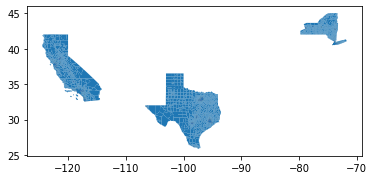

In [34]:
big_state_tracts_gdf.plot();

#### You may need to `pip install xlrd` for reading first

In [74]:
#!pip install xlrd

In [79]:
df = pd.read_excel('data/rollingsales_statenisland.xls')

#### Let's take a look at our DataFrame `.head()`

In [81]:
df.head()

,Staten Island Rolling Sales File. All Sales From April 2019 - March 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 04/15/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,NaN,A5,4716 AMBOY ROAD,NaN,...,1,0,1,1871,910,2002,1,A5,0,2019-07-10 00:00:00


#### What's wrong here? 

#### Let's look the file in Excel 

![https://raw.githubusercontent.com/pratt-savi-810/images/master/rolling_sales_head.png](https://raw.githubusercontent.com/pratt-savi-810/images/master/rolling_sales_head.png)

#### Let's specify the header row with the `header` argument in `pd.read_excel()`

Remember, Python uses 0 index, Excel uses 1 for first row. 

In [90]:
df = pd.read_excel('data/rollingsales_statenisland.xls', header=[4])

In [92]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,NaN,A5,4716 AMBOY ROAD,NaN,...,1.0,0.0,1.0,1871.0,910.0,2002.0,1,A5,0,2019-07-10
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,23,NaN,A1,525 SYCAMORE STREET,NaN,...,1.0,0.0,1.0,10000.0,2848.0,1980.0,1,A1,775000,2019-12-13
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,0.0,1.0,5000.0,2200.0,1940.0,1,A1,685000,2019-04-15
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5399,33,NaN,A2,247 KOCH BOULEVARD,NaN,...,1.0,0.0,1.0,7035.0,1528.0,1970.0,1,A2,0,2019-08-07
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,39,NaN,B2,193 BATHGATE STREET,NaN,...,2.0,0.0,2.0,5000.0,2800.0,2018.0,1,A2,1221900,2019-05-09


# Let's write a function to Extract the Fees for Santa Monica, CA Services over 2014 to 2022

#### Let's look at the fees and rate scheduel for different services in Santa Monica over 2014 to 2022.


https://data.smgov.net/browse?q=%22Fees%20and%20Rates%22%20Finance&sortBy=alpha&utf8=%E2%9C%93
![https://data.smgov.net/browse?q=%22Fees%20and%20Rates%22%20Finance&sortBy=alpha&utf8=%E2%9C%93](samo_fees_and_Rates_Screenshot.png)


Click through and download `csv`s for each of these years and collect them into a single folder. 
(On Dolphin in KDE Linux it looks like this)

![](downloaded_samo_fees_screenshot.png)

Open a few of these files and confirm they've all got the same headder

#### Optional Discuss Paths and File Systems?


In [54]:
from pathlib import Path
# https://docs.python.org/3/library/pathlib.html

samo_fees_base_path = Path('./samo_fees')
samo_fees_base_path.resolve()

PosixPath('/home/javier/learn/gis/py/pratt/pratt-savi-810-2020-03-lesson_11/completed/samo_fees')

In [55]:
yearly_fee_rates_list = sorted(glob.glob('samo_fees/*'))
yearly_fee_rates_list

['samo_fees/Fees_and_Rates_2014-15.csv',
 'samo_fees/Fees_and_Rates_2015-16.csv',
 'samo_fees/Fees_and_Rates_2016-17.csv',
 'samo_fees/Fees_and_Rates_2017-18.csv',
 'samo_fees/Fees_and_Rates_2018-19.csv',
 'samo_fees/Fees_and_Rates_2019-20.csv',
 'samo_fees/Fees_and_Rates_2021-2022.csv']

In [116]:
years_list = [2014,2015,2016,2017,2018,2019,2020,2021]

In [117]:
list(zip(yearly_fee_rates_list, years_list))

[('samo_fees/Fees_and_Rates_2014-15.csv', 2014),
 ('samo_fees/Fees_and_Rates_2015-16.csv', 2015),
 ('samo_fees/Fees_and_Rates_2016-17.csv', 2016),
 ('samo_fees/Fees_and_Rates_2017-18.csv', 2017),
 ('samo_fees/Fees_and_Rates_2018-19.csv', 2018),
 ('samo_fees/Fees_and_Rates_2019-20.csv', 2019),
 ('samo_fees/Fees_and_Rates_2021-2022.csv', 2020)]

In [118]:
def combine_years(list_of_files, year_list):
    total_rows = 0
    pdf_list = []
    
    for n, f in enumerate(list_of_files):
        print(year_list[n], f)
        pdf = pd.read_csv(f)
        pdf['year'] = year_list[n]
        num_rows = pdf.shape[0]
        print('    ', num_rows,'\n')
        total_rows += num_rows
        pdf_list.append(pdf)
        
    pdf_all = pd.concat(pdf_list)
    
    print(f'total rows: {total_rows}')
    return pdf_all

In [119]:
fees_all_years_pdf = combine_years(yearly_fee_rates_list, years_list)

2014 samo_fees/Fees_and_Rates_2014-15.csv
     1608 

2015 samo_fees/Fees_and_Rates_2015-16.csv
     1651 

2016 samo_fees/Fees_and_Rates_2016-17.csv
     1695 

2017 samo_fees/Fees_and_Rates_2017-18.csv
     1706 

2018 samo_fees/Fees_and_Rates_2018-19.csv
     1848 

2019 samo_fees/Fees_and_Rates_2019-20.csv
     1858 

2020 samo_fees/Fees_and_Rates_2021-2022.csv
     1782 

total rows: 12148


In [132]:
fees_all_years_pdf.shape

(12148, 23)

In [163]:
fees_all_years_pdf.head()

,Department,Division,Category,Activity,Keywords,Fee Name / Description,Fee,Fee - Other,Unit,Additional Fee,...,Comments,External Link,Notes,year,Fee Name/Description,Fee - Other,External Link(s),Additional Fee,FEE,fee_name
0,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",Annenberg Community Beach House Parking,12.0,NaN,per day,NaN,...,"Parking ranges from $8-12, depending on season...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN,Annenberg Community Beach House Parking
1,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",Annenberg Community Beach House Parking,3.0,NaN,per hour,NaN,...,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN,Annenberg Community Beach House Parking
2,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...","Annenberg Community Beach House, Pool Day Pass...",10.0,NaN,NaN,NaN,...,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."
3,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...","Annenberg Community Beach House, Pool Day Pass...",4.0,NaN,NaN,NaN,...,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."
4,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...","Annenberg Community Beach House, Pool Day Pass...",5.0,NaN,NaN,NaN,...,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."


In [ ]:
fees_all_years_pdf['Division'].unique()

array(['Cultural Affairs', 'Code Compliance', 'Building and Safety',
       'Cemetery', 'Water', 'Civil Engineering', 'Community Recreation',
       'City Planning/Development Review',
       'Transportation Planning and Engineering',
       'Community and Cultural Services',
       'Transportation Engineering and Management',
       'Resource Recovery & Recycling', 'Street Services', 'Airport',
       'Administration', 'Public Landscape', 'Fire', 'Police',
       'Animal Control Section', 'Records and Election Services',
       'Finance', 'Office of Sustainability and the Environment',
       'Library', 'Human Services', 'Pier Management', 'Big Blue Bus',
       'Strategic and Transportation Planning',
       'Mobility and Traffic Management', 'City TV', 'Parking Operations',
       'Cultural Affairs - Beach House', nan,
       'City Plannning Planning/Development Review', 'City Planning',
       'Mobility', 'City Planning Planning/Development Review'],
      dtype=object)

In [123]:
fees_all_years_pdf.columns.unique()

Index(['Department', 'Division', 'Category', 'Activity', 'Keywords',
       'Fee Name / Description', 'Fee', 'Fee - Other', 'Unit',
       'Additional Fee ', 'Additional Fee Unit', 'Deposit', 'Rate Tier',
       'Comments', 'External Link', 'Notes', 'year', 'Fee Name/Description',
       'Fee  -  Other', 'External Link(s)', 'Additional Fee', 'FEE'],
      dtype='object')

Coalesce the columns whose name changed
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine_first.html

And drop the old columns
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [134]:
name1 = 'Fee Name / Description'
name2 = 'Fee Name/Description'

fees_all_years_pdf['fee_name'] = fees_all_years_pdf[name1].combine_first(fees_all_years_pdf[name2])
fees_all_years_pdf.drop([name1, name2],axis=1).head()

,Department,Division,Category,Activity,Keywords,Fee,Fee - Other,Unit,Additional Fee,Additional Fee Unit,...,Rate Tier,Comments,External Link,Notes,year,Fee - Other,External Link(s),Additional Fee,FEE,fee_name
0,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",12.0,NaN,per day,NaN,NaN,...,NaN,"Parking ranges from $8-12, depending on season...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,Annenberg Community Beach House Parking
1,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",3.0,NaN,per hour,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,Annenberg Community Beach House Parking
2,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...",10.0,NaN,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."
3,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...",4.0,NaN,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."
4,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...",5.0,NaN,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."


In [152]:
yearly_swim_pass_fees_pdf = fees_all_years_pdf[fees_all_years_pdf['fee_name'] == 'Community Aquatics\n - Recreational and Fitness\n - Swim Pass\n - Residents - Adult'][['year','Fee']]#.set_index('year')
yearly_swim_pass_fees_pdf

,year,Fee
149,2014,55.0
1183,2015,55.0
150,2016,55.0
172,2017,55.0
168,2018,55.00
165,2019,55.00
1035,2020,NaN


looks like the fees haven't changed :)

If the did, this plot would be much more interesting.  Is there anything which has changed?

In [153]:
yearly_swim_pass_fees_pdf.dtypes

year     int64
Fee     object
dtype: object

In [154]:
yearly_swim_pass_fees_pdf['Fee'] = pd.to_numeric(yearly_swim_pass_fees_pdf['Fee'])

<AxesSubplot:xlabel='year'>

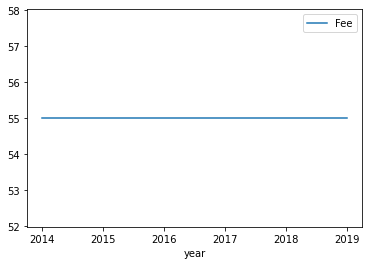

In [155]:
yearly_swim_pass_fees_pdf.plot(x='year',y='Fee')

In [191]:
yearly_parking_fees_pdf = fees_all_years_pdf[fees_all_years_pdf['fee_name'] == 'Community Event Fees,  Beach parking lot, 1550 PCH lot, Small'][['year','Fee']]

In [192]:
yearly_parking_fees_pdf

,year,Fee
1482,2014,2068.0
954,2015,2140.38
1483,2016,2236.7
1490,2017,2314.98
1492,2018,"2,416.84"
1470,2019,2518.34
227,2020,NaN


In [195]:
yearly_parking_fees_pdf['Fee'] = yearly_parking_fees_pdf['Fee'].replace(',','')

In [196]:
yearly_parking_fees_pdf['Fee'] 

1482     2068.0
954     2140.38
1483     2236.7
1490    2314.98
1492    2416.84
1470    2518.34
227         NaN
Name: Fee, dtype: object

In [197]:
yearly_parking_fees_pdf['Fee'] = pd.to_numeric(yearly_parking_fees_pdf['Fee'])

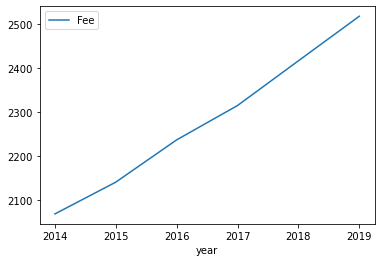

In [199]:
yearly_parking_fees_pdf.plot(x='year', y='Fee');

OK, so Parking Rates are really going up!

#### Let's import NYC NTA Boundaries and generate a GeoDataFrame

In [105]:
nyc_nta_geojson = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'

nta_gdf = gpd.read_file(nyc_nta_geojson)
nta_gdf.to_crs(epsg=2263, inplace=True)